In [300]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [371]:
np.log2(1)

0.0

In [484]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

i = data["TV"].where(data["TV"] >30).dropna().index.tolist()
data = data.drop([130, 155])
data["Newspaper"] = np.sqrt(data["Newspaper"])
data["TV"] = data["TV"]
data["Radio"] = 1/np.log(data["Radio"])
#m = residual.where(residual < -2).dropna().index.tolist()
data["Sales"] = 1/data["Sales"]


C:\Users\ktser\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [472]:
i = data["TV"].where(data["TV"] >30).dropna().index.tolist()

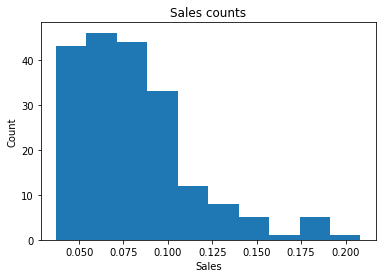

In [473]:
plt.hist(data["Sales"])
plt.title('Sales counts')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

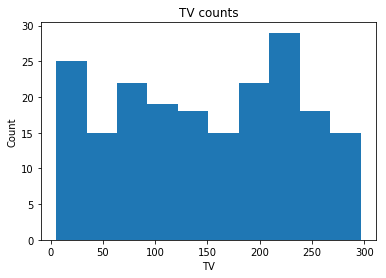

In [474]:
plt.hist(data["TV"])
plt.title('TV counts')
plt.xlabel('TV')
plt.ylabel('Count')
plt.show()

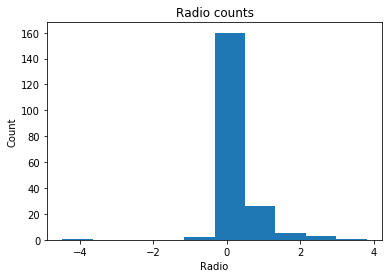

In [475]:
plt.hist(data["Radio"])
plt.title('Radio counts')
plt.xlabel('Radio')
plt.ylabel('Count')
plt.show()

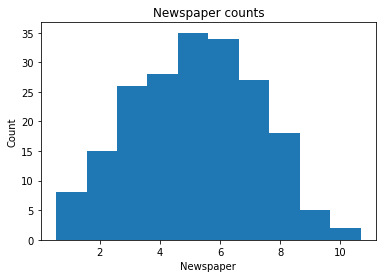

In [476]:
plt.hist(data["Newspaper"])
plt.title('Newspaper counts')
plt.xlabel('Newspaper')
plt.ylabel('Count')
plt.show()

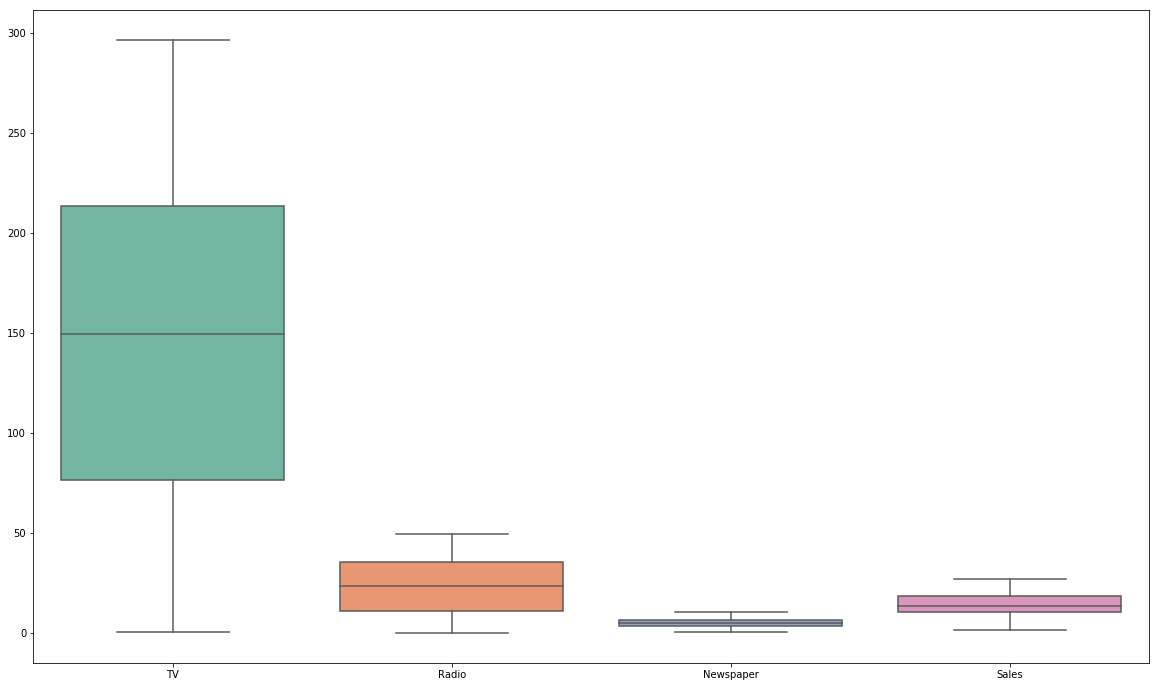

In [477]:
winlistdroped = k.drop(labels=["Unnamed: 0"], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.boxplot(data=winlistdroped, orient="v", palette="Set2")

In [478]:


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.00030083  0.00758015 -0.00179929]]

Intercept: 
 [ 0.1320891]

R-squared:
0.643182446547


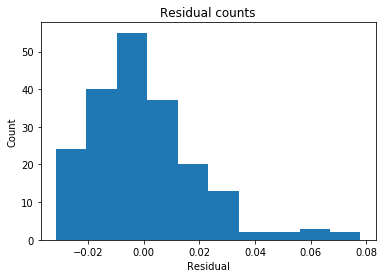

In [479]:
# multivariable normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

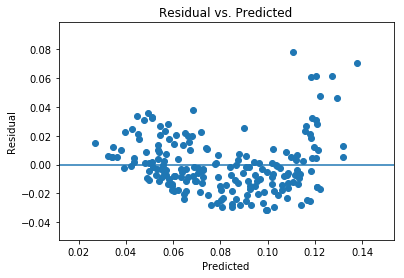

In [482]:
#Homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

Drill: fixing assumptions
Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.